# Presentación del Proyecto: Herramienta de Predicción Salarial para el Sector IT
### 1. Introducción: Problema y Solución
Este proyecto utiliza datos de las encuestas de Stack Overflow de 2023 y 2024 para desarrollar un modelo de predicción de salarios en el sector tecnológico. El objetivo principal es construir un pipeline automatizado que permita predecir la compensación total anual (CompTotal) de profesionales de IT en función de características como experiencia, tecnologías utilizadas y nivel educativo.

- *Problema*: El mercado IT en España es dinámico y competitivo, lo que dificulta que tanto particulares como reclutadores puedan establecer rangos salariales adecuados. Esto puede resultar en ofertas poco atractivas o en profesionales que no saben qué habilidades les ayudarán a crecer.
- *Solución*: Nuestra herramienta de predicción salarial ofrece orientación precisa basada en datos reales. A través de sencillas preguntas, los usuarios pueden:
    - Estimar el salario promedio en el mercado español para un perfil específico.
    - Identificar las tecnologías, industrias y experiencias que incrementan el valor salarial, permitiendo planificar su desarrollo profesional.
### 2. Dataset y Análisis Inicial
- *Fuente de Datos*: Utilizamos encuestas anuales de Stack Overflow (2023 y 2024), con una muestra de 1,934 registros y 397 variables. Este dataset ofrece una visión rica y detallada del sector IT.
- *Análisis Previo*: A pesar de no encontrar correlaciones claras entre las variables, el modelo logró identificar patrones complejos entre las respuestas, destacando las características que tienen un mayor impacto en la predicción salarial. Esto sugiere que los salarios dependen de múltiples factores no lineales.

### 3. Modelo y Selección de Características
- *Modelo Seleccionado*: Tras probar varios algoritmos (Linear Regressor, Random Forest, Gradient Boosting, etc.), el modelo más efectivo fue aquel que usó el top 35 features. Estas características fueron seleccionadas automáticamente según su contribución al desempeño del modelo, evaluado con métricas como R², MAE y MAPE.

- *Características Destacadas del Top 35:* Incluye variables como:
- YearsCodePro: Años de experiencia profesional programando.
- DevType: Tipo de rol (desarrollador backend, frontend, etc.).
- LanguageWantToWorkWith: Lenguajes de programación con los que se desea trabajar en el futuro. 
- ToolsTechHaveWorkedWith: Herramientas y tecnologías utilizadas.
- Curiosamente, algunas variables que parecían importantes quedaron fuera, mientras que otras secundarias sí fueron seleccionadas, lo que refleja la capacidad del modelo de identificar patrones no evidentes.

### 4. Aplicaciones Prácticas
- *Para Particulares:*
    - Orientación Salarial: Comprender cuánto podrían ganar según sus habilidades y experiencia.
    - Planificación Profesional: Identificar tecnologías, lenguajes o industrias que incrementen el salario, ayudándoles a tomar decisiones informadas para su crecimiento.
- *Para Reclutadores*:
- Ofertas Competitivas: Estimar salarios personalizados para candidatos, mejorando la atracción y retención de talento.
- Análisis de Mercado: Obtener una visión clara de las tendencias salariales en España.
### 5. Métricas de Evaluación
El modelo fue evaluado con varias métricas (estos resultados corresponden al conjunto de Test):
- R²: 0.5403, indicando una buena capacidad explicativa en contextos complejos.
- MSE: 46037445.1123 
- MAPE: 15.5457%; proporciona una visión porcentual del error, mostrando la utilidad de las predicciones para el usuario final.
- MAE: 5198.81 euros, una desviación razonable dada la diversidad de perfiles.
- RMSE: 6785.0899

# Estructura del Proyecto
El proyecto está organizado en los notebooks y archivos que se detallan a continuación. En el paso a paso de este Notebook se remitirá a cada cuaderno de trabajo específico en caso de queres más detalles del proceso. 

### 1. Análisis Exploratorio de Datos (EDA):
En los Notebooks de trabajo `"1. Primer Notebook.ipynb"`, `"2. Sof_23.ipynb"`, `"3. Sof_2024.ipynb"` y `"4. OutliersTarget.ipynb"` se realiza:

a. Visualización y análisis de la distribución de la variable objetivo (CompTotal).

b. Limpieza inicial de los datos.

c. Limpieza y Preparación del Dataset

d. Identificación y tratamiento de outliers utilizando técnicas como percentiles y rango intercuartílico (IQR).

##### a. Visualización y análisis de la distribución de la variable objetivo (CompTotal).

In [3]:
# Importo las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Carga los datasets de 2023 y 2024
sof_23 = pd.read_csv('../data/survey_results_public23.csv')
sof_24 = pd.read_csv('../data/survey_results_public.csv')

# Dataset de 2023
data_2023 = sof_23[(sof_23['Country'] == 'Spain') & sof_23['CompTotal'].notna()]
data_2023.reset_index(drop=True, inplace=True) # Reinicia los índices para mayor claridad
data_2023 = data_2023.drop(columns=['ResponseId']) # Elimina la columna innecesaria 'ResponseId'

# Hago lo mismo, pero con el dataset de 2024
data_2024 = sof_24[(sof_24['Country'] == 'Spain') & sof_24['CompTotal'].notna()]
data_2024.reset_index(drop=True, inplace=True)
data_2024 = data_2024.drop(columns=['ResponseId'])
data_2023.head()

Data 2023


,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,Less than 1 year,10,"Developer, back-end",2 to 9 employees,I have little or no influence,NaN,Start a free trial;Ask developers I know/work ...,Spain,EUR European Euro,35000.0,Clojure;PHP,Bash/Shell (all shells);HTML/CSS;JavaScript;Ko...,MariaDB;SQLite;Supabase,PostgreSQL,NaN,NaN,NaN,NaN,Capacitor,NaN,NaN,NaN,Emacs,Emacs;PhpStorm,Debian;Other Linux-based,Debian;Other Linux-based,NaN,NaN,Slack,Slack;Zoom,NaN,NaN,NaN,NaN,Stack Overflow,Multiple times per day,Yes,Less than once per month or monthly,"Yes, somewhat",NaN,Yes,Favorable,Increase productivity,Neither trust nor distrust,NaN,Learning about a codebase;Writing code;Documen...,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,10.0,Strongly agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,1-2 times a week,1-2 times a week,1-2 times a week,Less than 15 minutes a day,Less than 15 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Too long,Neither easy nor difficult,37481.0
1,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Freelance/contract work,"Associate degree (A.A., A.S., etc.)","On the job training;School (i.e., University, ...",NaN,NaN,15,15,"Developer, back-end","10,000 or more employees",I have little or no influence,NaN,Ask developers I know/work with;Visit develope...,Spain,EUR European Euro,70000.0,Elixir;Go;Java;JavaScript;PHP;Ruby,Elixir;Go;Java;JavaScript;Kotlin;Rust,MySQL;PostgreSQL;Redis,NaN,Amazon Web Services (AWS);Digital Ocean;Google...,Amazon Web Services (AWS);Digital Ocean;Google...,jQuery;Node.js;Spring Boot;WordPress,Node.js;Phoenix;Spring Boot,NaN,NaN,Docker;Gradle;Homebrew;Kubernetes;Maven (build...,Docker;Gradle;Homebrew;Kubernetes;Maven (build...,IntelliJ IDEA;Vim;Visual Studio Code,IntelliJ IDEA;Vim;Visual Studio Code,MacOS;Windows,MacOS,Confluence;GitHub Discussions,GitHub Discussions,Skype;Slack;Zoom,Skype;Slack;Zoom,ChatGPT,ChatGPT,NaN,NaN,Stack Overflow,A few times per month or weekly,Yes,Less than once per month or monthly,"No, not really",Yes,"No, but I plan to soon",Indifferent,NaN,Neither trust nor distrust,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,15.0,Agree,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Agree,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Informatio

In [4]:
data_2024.head()

Data 2024


,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Books;Written Tutorial...,API document(s) and/or SDK document(s);Traditi...,14,10,DevOps specialist,500 to 999 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,Quality support system;Reputation for quality ...,Spain,EUR European Euro,80000.0,Bash/Shell (all shells);Python;SQL,Go,NaN,NaN,NaN,NaN,OpenStack,NaN,NaN,Django;Flask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,APT;Docker;Kubernetes;Pip;Terraform,Kubernetes,Kubernetes,Vim;Visual Studio Code,NaN,NaN,Android;Ubuntu,Ubuntu,GitHub Discussions;Jira,NaN,NaN,Google Meet;Matrix;Mattermost,NaN,NaN,NaN,NaN,NaN,Stack Overflow;Stack Exchange,A few times per month or weekly,Yes,Less than once per month or monthly,Quickly finding code solutions,"Yes, somewhat","No, but I plan to soon",Favorable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Circulating misinformation or disinformation;M...,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,85925.0,NaN
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,API document(s) and/or SDK document(s);User gu...,15,11,Engineering manager,10 to 19 employees,I have a great deal of influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Quality support system;Repu...,Spain,EUR European Euro,85000.0,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,Bash/Shell (all shells);Go;HTML/CSS;JavaScript...,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,MariaDB;MongoDB;MySQL;SQLite,Cockroachdb;MariaDB;MySQL;PostgreSQL;SQLite,MariaDB;MySQL;SQLite,Amazon Web Services (AWS);Cloudflare;Google Cl...,Amazon Web Servi

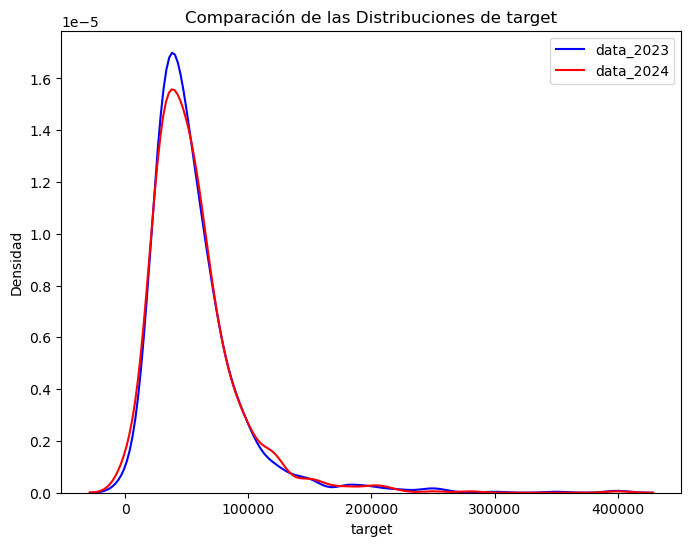

In [1]:
# Visualización combinada de las distribuciones de 'CompTotal'
plt.figure(figsize=(8, 6))  # Configura el tamaño del gráfico
sns.kdeplot(data_2023['CompTotal'], label='data_2023', color='blue')  # Curva KDE para data_2023
sns.kdeplot(data_2024['CompTotal'], label='data_2024', color='red')   # Curva KDE para data_2024
plt.title('Comparación de las Distribuciones de target')  # Título del gráfico
plt.xlabel('target')  # Etiqueta del eje X
plt.ylabel('Densidad')  # Etiqueta del eje Y
plt.legend()  # Muestra la leyenda para identificar cada curva
plt.show()  # Muestra el gráfico

Aqui se puede ver cómo las curvas de las distribuciones de data_2023 y data_2024 son similares, ambas muestran una distribución asimétrica positiva con un pico principal cercano a 50,000. Sin embargo, data_2024 presenta una cola más gruesa en los valores altos y mayor densidad entre 100,000 y 200,000. Estas similitudes permiten combinar ambos conjuntos para el modelado.

Para más explicación, se puede ver el detalle en `"1. PrimerNotebook.ipynb"`

##### b. Limpieza inicial de los datos: outliers

En esta etapa, se realizaron transformaciones y ajustes para garantizar la calidad de los datos:
- Se eliminaron valores atípicos y nulos en CompTotal
- Se corrigieron errores de escala como compensaciones mensuales reportadas en lugar de anuales
- Se eliminaron registros inconsistentes
- Se verificaron ingresos altos plausibles. 
- Los datos finales, sin outliers, se exportaron en formato pickle para utilizarlos en los siguientes Notebooks `"2. Sof_23.ipynb"` y `"3. Sof_2024.ipynb"`.

##### c. Limpieza y Preparación del Dataset
- Imputación de Valores Faltantes
- Codificación de Variables Categóricas: se han utilizado técnicas de `LabelEncoder`, `OneHotEncoder` y funciones específicas según la columna que se trate. Cada una recibió un tratamiento particular, luego de un estudio exhaustivo del dataset original, y teniendo en cuenta el objetivo del trabajo. 
- Elimimación de variables irrelevantes

##### d. Identificación y tratamiento de outliers utilizando técnicas como percentiles y rango intercuartílico (IQR).

En el cuarto notebook `"4. Otliers_target.ipynb"`, se analizó la distribución de la variable objetivo (CompTotal) para identificar y tratar valores extremadamente altos o bajos que podrían afectar el rendimiento del modelo. A partir de un análisis visual y estadístico, se observó una distribución asimétrica positiva, con una mayor concentración de salarios entre 20,000 y 80,000 euros, y una cola que se extiende hacia valores más altos.

Se probaron varias técnicas para manejar outliers, incluyendo el rango intercuartílico (IQR), percentiles, y clustering mediante K-Means. Sin embargo, la segmentación por clústeres resultó en tamaños de muestra insuficientes para entrenar modelos robustos. Finalmente, se utilizó el método de percentiles, estableciendo límites entre 18000 y 55000 euros. Es decir, se utilizó el análisis de los percentiles, pero enriquecito por los insights obtenidos con el modelo de KMeans. 

Además, se exploró una estrategia de modelado diferenciada para separar los datos en grupos de salarios "normales" y "altos". Aunque esta segmentación mostró patrones diferenciados entre ambos grupos, la cantidad limitada de datos en el grupo de salarios altos planteó desafíos de sobreajuste y baja generalización. Como resultado, se priorizó trabajar con el rango delimitado por percentiles en un único modelo. Este enfoque establece la base para el desarrollo de modelos predictivos más efectivos en los pasos siguientes del proyecto.

In [9]:
# Cargar el DataFrame desde el archivo
with open('../Pickles/df_final.pickle', 'rb') as archivo:
    df = pickle.load(archivo)
# Reemplazar todos los NaN con 0
df.fillna(0, inplace=True)

Gráficas de la columna `CompTotal` (target)

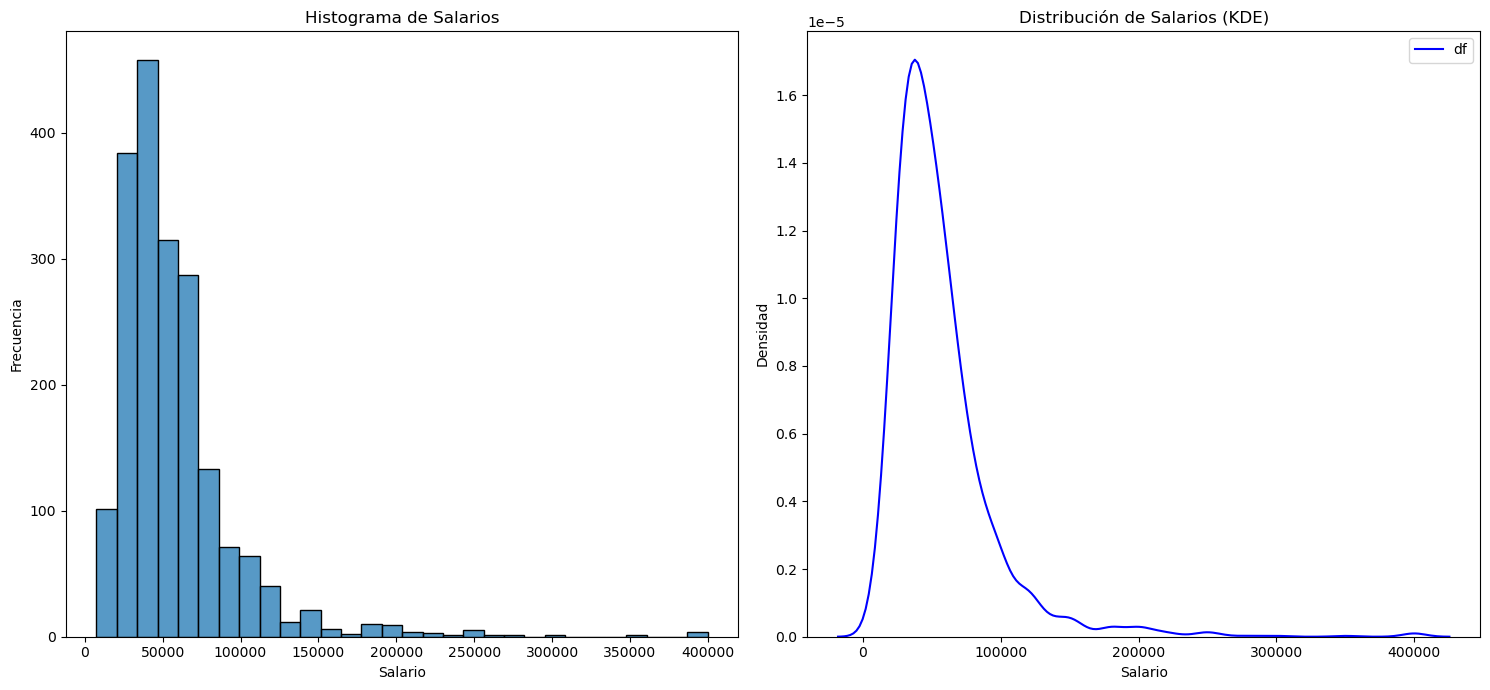

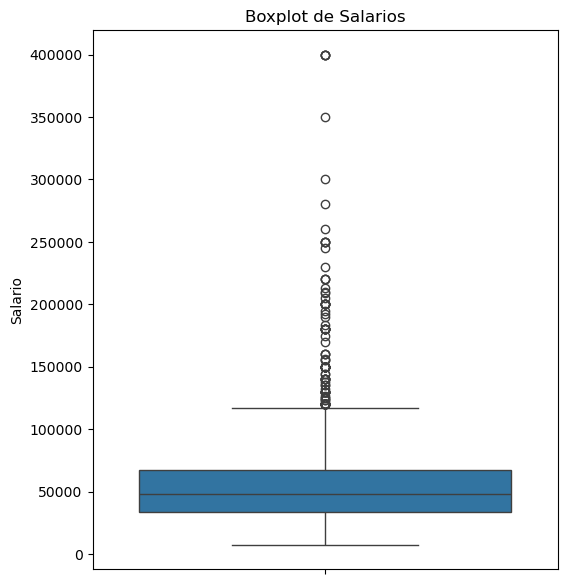

In [8]:
# 1. Histograma y gráfico de densidad
plt.figure(figsize=(15, 7))

# Histograma
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
sns.histplot(df['CompTotal'], kde=False, bins=30)
plt.title('Histograma de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')

# KDE Plot
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
sns.kdeplot(df['CompTotal'], label='df', color='blue')
plt.title('Distribución de Salarios (KDE)')
plt.xlabel('Salario')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Boxplot
plt.figure(figsize=(6, 7))
sns.boxplot(y=df['CompTotal'])
plt.title('Boxplot de Salarios')
plt.ylabel('Salario')
plt.show()

Gráficas de la columna objetivo si lo dividimos por Clusters

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

y = df[['CompTotal']].copy()  # 'y' ahora contiene la variable objetivo

# Escalar los datos (en este caso, solo la columna de salarios)
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y) # 'y_scaled' contiene los salarios escalados

# Aplicar K-Means con 2 clústeres
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(y_scaled)

# Obtener las etiquetas de los clústeres
labels = kmeans.labels_

# Agregar las etiquetas al DataFrame original
df['cluster'] = labels

# Separar los grupos
df_cluster_0 = df[df['cluster'] == 0]
df_cluster_1 = df[df['cluster'] == 1]
df_cluster_2 = df[df['cluster'] == 2]
df_cluster_3 = df[df['cluster'] == 3]

C:\Users\emita\AppData\Local\Temp\ipykernel_2596\4048616218.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = labels


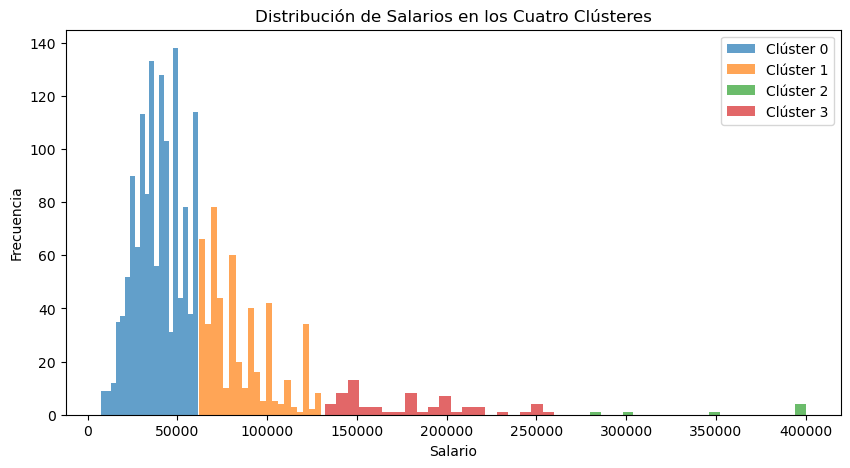

In [12]:
# Histograma de los dos grupos
plt.figure(figsize=(10, 5))
plt.hist(df_cluster_0['CompTotal'], bins=20, alpha=0.7, label='Clúster 0')
plt.hist(df_cluster_1['CompTotal'], bins=20, alpha=0.7, label='Clúster 1')
plt.hist(df_cluster_2['CompTotal'], bins=20, alpha=0.7, label='Clúster 2')
plt.hist(df_cluster_3['CompTotal'], bins=20, alpha=0.7, label='Clúster 3')
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.title("Distribución de Salarios en los Cuatro Clústeres")
plt.legend()
plt.show()

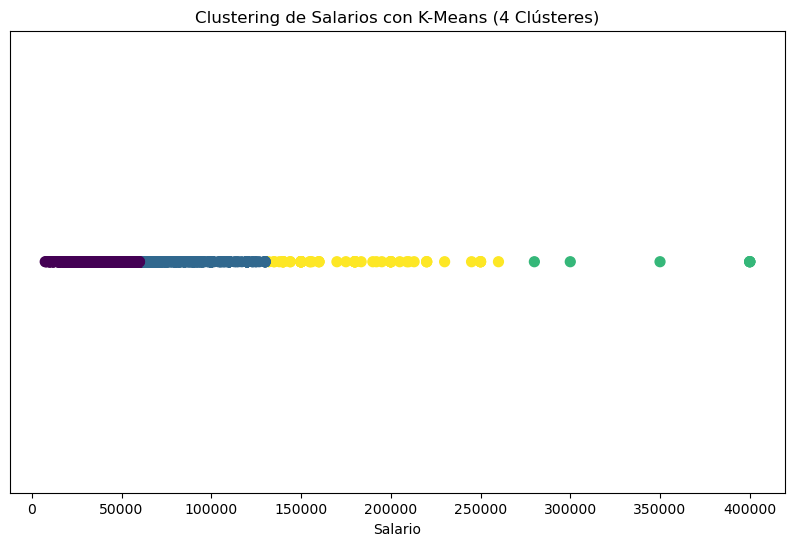

In [13]:
# Visualizar los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(df['CompTotal'], [0] * len(df), c=df['cluster'], cmap='viridis', s=50)
plt.xlabel("Salario")
plt.title("Clustering de Salarios con K-Means (4 Clústeres)")
plt.yticks([])  # Ocultar el eje y
plt.show()

Para garantizar que el modelo predictivo generalice correctamente y no se vea afectado por valores extremos, se decidió eliminar los outliers tanto del límite inferior como del superior de la variable objetivo (CompTotal). Tras un análisis visual y estadístico, se establecieron límites razonables utilizando el método de percentiles: 18000 euros como límite inferior (alineado con el convenio colectivo del sector) y 55000 euros como límite superior, el límite del Cluster0.

La eliminación de estos outliers, que representan un 39.71% del total de datos, permitió reducir el conjunto a 1166 observaciones. Este enfoque es crucial, ya que los datos extremos distorsionaban los patrones generales y dificultaban que el modelo aprendiera de manera efectiva. Mantener estos valores habría llevado a problemas como:
- Sobreajuste: El modelo podría ajustarse demasiado a valores extremos, perdiendo capacidad de generalización para datos más representativos.
- Pérdida de precisión: La dispersión causada por los outliers habría afectado negativamente las métricas de evaluación, como MAE y MAPE.
- Relaciones espurias: Los valores extremos pueden influir desproporcionadamente en el aprendizaje del modelo, desviando la importancia asignada a las características.

La reducción del rango salarial a valores más representativos permitió al modelo centrarse en los patrones predominantes de la población objetivo. Esta decisión asegura un equilibrio entre la eliminación de valores extremos y la retención de datos suficientes para entrenar un modelo robusto, garantizando un rendimiento más confiable y generalizable en escenarios reales.

In [25]:
# Cargar el DataFrame desde el archivo
with open('../Pickles/df_final.pickle', 'rb') as archivo:
    df = pickle.load(archivo)
# Reemplazar todos los NaN con 0
df.fillna(0, inplace=True)

In [26]:
limite_inferior = 18000
limite_superior = 55000

df_filtrado = df[(df['CompTotal'] >= limite_inferior) & (df['CompTotal'] <= limite_superior)]

print(f"Tamaño del DataFrame original: {df.shape}")
print(f"Tamaño del DataFrame filtrado: {df_filtrado.shape}")

df = df_filtrado

Tamaño del DataFrame original: (1934, 397)
Tamaño del DataFrame filtrado: (1166, 397)


### 2. Feature Engineering:

Notebook de trabajo `"5. Feature_Selection.ipynb"`:

Para optimizar el rendimiento del modelo y reducir la dimensionalidad del conjunto de datos, se llevará a cabo un *proceso iterativo de selección de características* basado en la evaluación de un modelo `Random Forest` con su configuración por defecto. Partiendo de un conjunto inicial de casi 400 variables, se implementará una estrategia de adición secuencial de grupos de características.

En cada iteración, se agregará un nuevo grupo de variables al conjunto de características seleccionadas hasta ese momento. Se entrena un modelo Random Forest con la configuración por defecto utilizando este conjunto ampliado de variables y se evalará su rendimiento, comparando las distintas métricas.

Si la inclusión del nuevo grupo de variables resulta en una disminución de las métricas (es decir, una mejora en el rendimiento), estas variables se incorporarán permanentemente al conjunto de características seleccionadas. En caso contrario, el grupo de variables se descartará.

Este proceso iterativo se continuará hasta que no se observen mejoras significativas en las métricas tras la adición de nuevos grupos de variables. 

**Conclusión**: Como resultado de este procedimiento, se obtendrá un conjunto final de 200 características, que constituyen el subconjunto de variables más relevantes para la predicción de la variable objetivo según el criterio del modelo Random Forest.

### 3. Entrenamiento del Modelo:

**Desarrollo del Modelo Predictivo Definitivo**: Notebook de trabajo `"6. VotingModelo.ipynb"`
En este notebook se implementó el modelo final para la predicción de la compensación anual total *(CompTotal)*, utilizando datos filtrados y procesados. Se establecieron límites entre 18000 y 55000 euros para eliminar outliers, y se aplicó una transformación logarítmica para manejar la asimetría de los datos. Se seleccionaron 35 variables clave mediante *feature engineering* y se normalizaron con MinMaxScaler.

El modelo combina tres algoritmos base (`Random Forest`, `Gradient Boosting` y `XGBoost`) mediante un `Voting Regressor` con pesos ajustados. Su rendimiento se evaluó con validación cruzada (5 folds), obteniendo métricas como R², MAE, MAPE, MSE, y RMSE que reflejan su capacidad de generalización. Finalmente, el modelo y el escalador fueron exportados en formato pickle, listos para su implementación en el pipeline y prueba con datos externos. Este paso concluye el desarrollo del modelo dentro del proyecto.

```python
=== Métricas de Cross-Validation ===
R² (promedio CV): 0.4840
MSE (promedio CV): 53530181.3852
RMSE (promedio CV): 7316.4323
MAE (promedio CV): 5571.7548
MAPE (promedio CV): 16.3699%
=== Métricas de Test ===
R² (Test): 0.5403
MSE (Test): 46037445.1123
RMSE (Test): 6785.0899
MAE (Test): 5198.8158
MAPE (Test): 15.5457%
```

### 4. Pipeline Automático:

**Implementación del Modelo Predictivo en un Pipeline Automático** Notebook de trabajo `"7. PipelineModelo.ipynb"`

En este notebook se desarrolló un pipeline automatizado para la predicción de salarios en el sector tecnológico. Este pipeline integra el preprocesamiento, el escalado y el modelo predictivo en un único flujo de trabajo, optimizando la reproducibilidad y el rendimiento del modelo.

El pipeline incluye un preprocesador personalizado (`CustomPreprocessor`) que realiza transformaciones clave, como mapeos ordinales y categóricos, codificación One-Hot y MultiLabel, target encoding y tratamiento de valores faltantes. Posteriormente, las características numéricas se normalizan utilizando MinMaxScaler, y el modelo predictivo `VotingRegressor` se integra directamente en el pipeline.

Finalmente, el pipeline entrenado se exportó con `joblib`, permitiendo su reutilización sin necesidad de repetir el preprocesamiento ni el entrenamiento. Este diseño asegura predicciones consistentes y facilita su implementación en el pipeline de producción.

### 5. Despliegue en Streamlit:

**Aplicación Web para la Predicción de Salarios**

Como parte final del proyecto, se desarrolló una aplicación web interactiva utilizando `Streamlit`. Esta herramienta permite a los usuarios ingresar sus características personales y profesionales para obtener una predicción personalizada de su salario anual en el sector IT. La aplicación implementa el modelo predictivo entrenado e integra el pipeline completo de preprocesamiento, escalado y predicción, garantizando un flujo de trabajo consistente y automatizado.

**Funcionamiento de la Aplicación**
- *Interfaz de Usuario Dinámica:*: 
    - La aplicación cuenta con un formulario dinámico que recoge información clave, como nivel educativo, años de experiencia, lenguajes y herramientas utilizadas, entre otros.
    - Los datos ingresados se estructuran en un formato compatible con el pipeline, asegurando que sean procesados de manera uniforme.
- *Pipeline Integrado*:
    - Al enviar los datos, la aplicación utiliza el pipeline previamente entrenado y guardado en formato pickle para transformar las entradas del usuario y realizar la predicción.
    - La predicción se realiza en tiempo real, devolviendo el salario anual estimado en base a las características ingresadas.
- *Visualización de Resultados:*
    - La aplicación presenta el resultado de forma clara, mostrando el salario anual predicho en formato monetario y resaltando la cifra para facilitar su interpretación.
- *Objetivo del Despliegue*: El objetivo principal de desplegar esta aplicación web es:
    - Accesibilidad: Permitir que cualquier usuario, sin necesidad de conocimientos técnicos, pueda interactuar con el modelo predictivo.
    - Validación Práctica: Probar el modelo en un entorno real con datos ingresados directamente por usuarios finales.
    - Escalabilidad: Ofrecer una solución que pueda ser adaptada y utilizada como herramienta en procesos de selección, negociación salarial o benchmarking en la industria IT.

### 6. Conclusión y Propuesta de Valor

**Conclusión**: 

La herramienta que hemos desarrollado marca un punto de partida crucial para abordar un problema complejo en el sector IT: la falta de claridad y orientación en las bases salariales. Este producto destaca por su capacidad de:
- *Basarse en datos reales y sin sesgos*: Las predicciones se generan utilizando respuestas de miles de profesionales del sector IT, eliminando prejuicios subjetivos y asegurando una perspectiva basada en evidencia.
- *Aprovechar el poder de la IA*: Los algoritmos avanzados han permitido identificar patrones complejos que no son fácilmente observables a simple vista, lo que aporta confianza en las predicciones.
- *Proporcionar utilidad directa*: Ofrece respuestas específicas y personalizadas que son prácticas tanto para individuos como para empresas, haciendo que el producto sea aplicable en múltiples escenarios.

**Propuesta de Valor**

Este producto tiene el potencial de transformar la forma en que se toman decisiones relacionadas con salarios en el sector IT. Concretamente:
- *Para Particulares:*
    - Herramienta de autodescubrimiento: Permite a los usuarios entender cómo sus habilidades actuales se traducen en términos salariales y qué pasos podrían tomar para incrementar su valor en el mercado.
    - Planificación basada en datos: Identificar tecnologías o sectores emergentes que ofrecen mejores salarios, ayudando a orientar sus esfuerzos de aprendizaje y desarrollo profesional.
    - Confianza y motivación: Proporcionar una base objetiva que elimine incertidumbre y ayude a planificar el futuro profesional con mayor seguridad.
- *Para Reclutadores:*
    - Ofertas más competitivas: Ayuda a crear propuestas salariales que atraigan talento, asegurándose de que las ofertas estén alineadas con las expectativas reales del mercado.
    - Toma de decisiones informada: Usar los resultados para analizar tendencias salariales y construir estrategias de contratación más efectivas.
    - Adaptación a nichos específicos: Reclutadores pueden entender cómo ajustar sus estrategias según roles, tecnologías o niveles de experiencia.

#### ***Siguientes Pasos:***

Para maximizar el impacto del producto y ampliar su utilidad, estos son los próximos desarrollos propuestos:
1. Incorporar opciones de filtrado y personalización:
    - Permitir a los usuarios segmentar predicciones por regiones, industrias específicas, o perfiles demográficos.
    - Personalizar resultados según características concretas, como el stack tecnológico o el tipo de empresa deseada.
2. Refinamiento del modelo para diferencias regionales o sectoriales:
    - Analizar y ajustar el modelo para capturar variaciones salariales según ubicación geográfica o sectores de la industria.
    - Incorporar bases de datos complementarias que representen regiones específicas, ampliando la aplicabilidad del modelo.
3. Ampliar la base de datos:
    - Incorporar datos de futuras encuestas de Stack Overflow y otras fuentes reconocidas.
    - Crear mecanismos para recoger nuevas entradas de datos directamente desde usuarios interesados, aumentando la relevancia y frescura del dataset.
4. Explorar integraciones y expansiones:
    - Desarrollar una API para permitir que otras plataformas de recursos humanos o portales de empleo integren las predicciones salariales.
    - Ampliar el alcance del modelo a sectores fuera del IT, utilizando el mismo enfoque de análisis.